In [22]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

In [23]:

breeding_bird_df = pd.read_csv("noisy_datasets/breeding_bird_atlas.csv")
print("\nbreeding_bird Dataset\n", breeding_bird_df.describe())
breeding_bird_df.head()


breeding_bird Dataset
          Fed. Region        Month          Day           Year    Temperature  \
count  355787.000000  3426.000000  9338.000000  351102.000000  361582.000000   
mean        5.855652    49.772329    49.511994    1964.180056      49.467487   
std         5.836586    28.659289    28.794700     190.069866      17.322758   
min         0.000000     0.000000     0.000000       0.000000      20.000000   
25%         3.000000    26.000000    25.000000    1982.000000      34.000000   
50%         6.000000    50.000000    49.000000    1983.000000      49.000000   
75%         8.000000    74.000000    75.000000    1984.000000      64.000000   
max        99.000000    99.000000    99.000000    1985.000000      79.000000   

       Average UB Student GPA  
count           361582.000000  
mean                 2.850668  
std                  0.490552  
min                  2.000000  
25%                  2.430000  
50%                  2.850000  
75%                  3.280000  

,Fed. Region,Block ID,Map Link,County,Common Name,Scientific Name,NYS Protection Status,Family Name,Family Description,Breeding Behavior,Month,Day,Year,Temperature,Average UB Student GPA,Breeding Status
0,NaN,5773C,50,NaN,NaN,12,10,71,TYRANT FLYCATCHERS,singing male present on more than one date in ...,NaN,NaN,1985.0,59,2.26,Probable
1,8.0,5569B,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5569b...,ALBANY,Alder Flycatcher,Empidonax alnorum,Protected,TYRANNIDAE,TYRANT FLYCATCHERS,"Nest and eggs, bird on nest or egg, or eggshel...",NaN,NaN,1985.0,78,2.77,Confirmed
2,8.0,5773C,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5773c...,ALBANY,American Black Duck,Anas rubripes,Game Species,ANATIDAE,"SWANS, GEESE & DUCKS",Pair observed in suitable habitat in breeding ...,NaN,NaN,1985.0,72,3.08,Probable
3,8.0,5872A,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5872a...,ALBANY,American Black Duck,Anas rubripes,Game Species,ANATIDAE,"SWANS, GEESE & DUCKS",Species seen in possible nesting habitat or si...,NaN,NaN,1985.0,52,2.09,Possible
4,8.0,5570D,http://www.dec.ny.gov/data/dfwmr/bba/pdf/5570d...,ALBANY,American Crow,Corvus brachyrhynchos,Game Species,CORVIDAE,"JAYS, MAGPIES & CROWS",Singing male present on more than one date in ...,NaN,NaN,1985.0,28,2.28,Probable


In [24]:
breeding_bird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361582 entries, 0 to 361581
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Fed. Region             355787 non-null  float64
 1   Block ID                358864 non-null  object 
 2   Map Link                356865 non-null  object 
 3   County                  350980 non-null  object 
 4   Common Name             351052 non-null  object 
 5   Scientific Name         354097 non-null  object 
 6   NYS Protection Status   353112 non-null  object 
 7   Family Name             359126 non-null  object 
 8   Family Description      356849 non-null  object 
 9   Breeding Behavior       356399 non-null  object 
 10  Month                   3426 non-null    float64
 11  Day                     9338 non-null    float64
 12  Year                    351102 non-null  float64
 13  Temperature             361582 non-null  int64  
 14  Average UB Student G

In [25]:
breeding_bird_df = breeding_bird_df.dropna(subset=breeding_bird_df.select_dtypes(include='object').columns)
print("Since we have very little values for Month and Day, we will drop it, and as UB Student GPA is not related to the data, we will drop it.")
breeding_bird_df = breeding_bird_df.drop(columns=['Average UB Student GPA','Month', 'Day'])
breeding_bird_df['Fed. Region'] = breeding_bird_df['Fed. Region'].fillna(method='ffill')
breeding_bird_df['Year'] = breeding_bird_df['Year'].fillna(method='ffill')
numeric_cols = breeding_bird_df.select_dtypes(include='number').columns.difference(['Fed. Region', 'Year'])
breeding_bird_df[numeric_cols] = breeding_bird_df[numeric_cols].fillna(breeding_bird_df[numeric_cols].mean())
object_columns = ['Block ID', 'Map Link' 'County', 'Common Name', 'Scientific Name', 'NYS Protection Status', 'Family Name', 'Family Description', 'Breeding Behavior', 'Breeding Status']



Since we have very little values for Month and Day, we will drop it, and as UB Student GPA is not related to the data, we will drop it.


C:\Users\ruthv\AppData\Local\Temp\ipykernel_17952\1442270307.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  breeding_bird_df['Fed. Region'] = breeding_bird_df['Fed. Region'].fillna(method='ffill')
C:\Users\ruthv\AppData\Local\Temp\ipykernel_17952\1442270307.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  breeding_bird_df['Year'] = breeding_bird_df['Year'].fillna(method='ffill')


In [26]:
breeding_bird_df['Block ID'] = breeding_bird_df['Block ID'].apply(lambda x: x if re.match(r'^\d+[A-Z]$', str(x)) else 'unknown')
breeding_bird_df['Common Name'] = breeding_bird_df['Common Name'].apply(lambda x: 'unknown' if re.match(r'^\d+$', str(x)) else x)
breeding_bird_df['Scientific Name'] = breeding_bird_df['Scientific Name'].apply(lambda x: 'unknown' if re.match(r'^\d+$', str(x)) else x)
breeding_bird_df['County'] = breeding_bird_df['County'].apply(lambda x: 'unknown' if re.match(r'^\d+$', str(x)) else x)
breeding_bird_df['Map Link'] = breeding_bird_df['Map Link'].apply(lambda x: 'unknown' if re.match(r'^\d+$', str(x)) else x)
breeding_bird_df['NYS Protection Status'] = breeding_bird_df['NYS Protection Status'].apply(lambda x: 'unknown' if re.match(r'^\d+$', str(x)) else x)
breeding_bird_df['Family Name'] = breeding_bird_df['Family Name'].apply(lambda x: 'unknown' if re.match(r'^\d+$', str(x)) else x)
breeding_bird_df['Family Description'] = breeding_bird_df['Family Description'].apply(lambda x: 'unknown' if re.match(r'^\d+$', str(x)) else x)
breeding_bird_df['Family Description'] = breeding_bird_df['Family Description'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', str(x)))
breeding_bird_df['Breeding Behavior'] = breeding_bird_df['Breeding Behavior'].apply(lambda x: 'unknown' if re.match(r'^\d+$', str(x)) else x)
breeding_bird_df['Breeding Status'] = breeding_bird_df['Breeding Status'].apply(lambda x: 'unknown' if re.match(r'^\d+$', str(x)) else x)
breeding_bird_df = breeding_bird_df[~breeding_bird_df['Common Name'].isin(['unknown']) & ~breeding_bird_df['Scientific Name'].isin(['unknown'])]
object_columns = ['Block ID', 'Map Link', 'County', 'Common Name', 'Scientific Name', 'NYS Protection Status', 'Family Name', 'Family Description', 'Breeding Behavior', 'Breeding Status']
breeding_bird_df[object_columns] = breeding_bird_df[object_columns].applymap(lambda x: str(x).strip().lower()) 

C:\Users\ruthv\AppData\Local\Temp\ipykernel_17952\2770321947.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  breeding_bird_df[object_columns] = breeding_bird_df[object_columns].applymap(lambda x: str(x).strip().lower())


In [27]:
Q1 = breeding_bird_df.select_dtypes(include='number').quantile(0.25)
Q3 = breeding_bird_df.select_dtypes(include='number').quantile(0.75)
IQR = Q3 - Q1
outliers_lower = Q1 - 1.5 * IQR
outliers_upper = Q3 + 1.5 * IQR
outlier_filter = (breeding_bird_df.select_dtypes(include='number') < outliers_lower) | (breeding_bird_df.select_dtypes(include='number') > outliers_upper)
outlier_count = outlier_filter.any(axis=1).sum()
print(f'Outlier count: {outlier_count}, since is less compared to whole dataset, we will drop.')
breeding_bird_df = breeding_bird_df[~outlier_filter.any(axis=1)]
breeding_bird_df.info()

Outlier count: 595, since is less compared to whole dataset, we will drop.
<class 'pandas.core.frame.DataFrame'>
Index: 330102 entries, 1 to 361581
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Fed. Region            330102 non-null  float64
 1   Block ID               330102 non-null  object 
 2   Map Link               330102 non-null  object 
 3   County                 330102 non-null  object 
 4   Common Name            330102 non-null  object 
 5   Scientific Name        330102 non-null  object 
 6   NYS Protection Status  330102 non-null  object 
 7   Family Name            330102 non-null  object 
 8   Family Description     330102 non-null  object 
 9   Breeding Behavior      330102 non-null  object 
 10  Year                   330102 non-null  float64
 11  Temperature            330102 non-null  int64  
 12  Breeding Status        330102 non-null  object 
dtypes: float64(2), int6

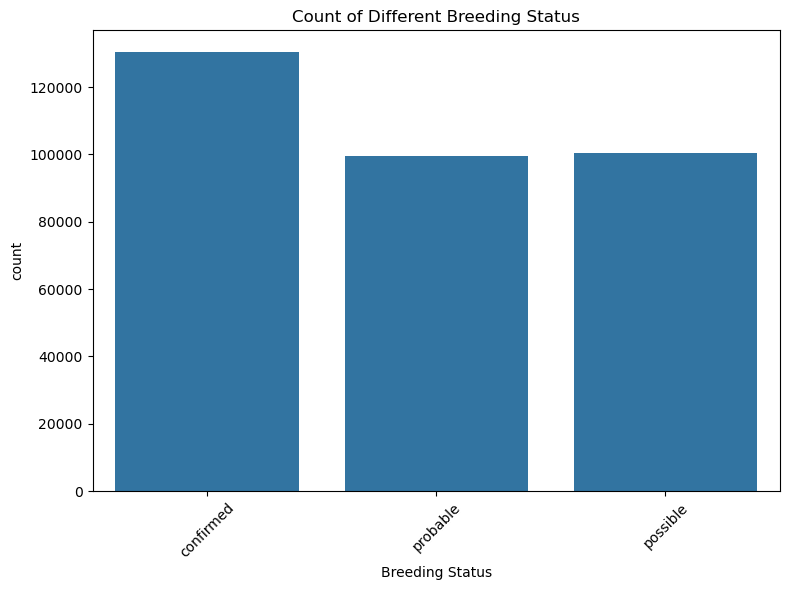

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=breeding_bird_df, x='Breeding Status')
plt.title('Count of Different Breeding Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

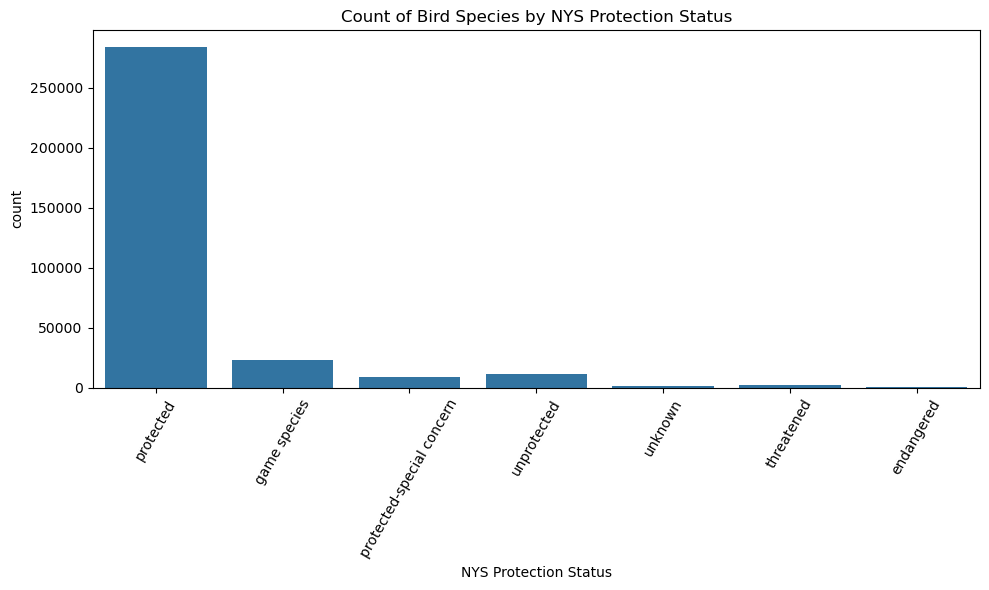

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=breeding_bird_df, x='NYS Protection Status')
plt.title('Count of Bird Species by NYS Protection Status')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()